In [ ]:
import ast
import os
from pathlib import Path
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt

# Get list of all CSV files in the directory
list_of_files = list(Path("../../logs/performance_filters_hnsw").rglob("*.csv"))

# Find the latest file
latest_file = max(list_of_files, key=os.path.getctime)

# Load the latest CSV file into a DataFrame
df_latest = pd.read_csv(latest_file)
# "timestamp", "column_name", "k","execution_time","filter_size_right","filter_size_wrong","filter_size","num_results",

print(df_latest)

               timestamp  percentile comparison  reference fainder_mode  \
0    2025-03-16 13:07:39         0.1         le          1   run_approx   
1    2025-03-16 13:07:42         0.1         le          1   run_approx   
2    2025-03-16 13:07:44         0.1         le          1   run_approx   
3    2025-03-16 13:07:47         0.1         le          1   run_approx   
4    2025-03-16 13:07:50         0.1         le          1   run_approx   
..                   ...         ...        ...        ...          ...   
339  2025-03-16 13:48:13         0.1         le          1    run_exact   
340  2025-03-16 13:48:46         0.1         le          1    run_exact   
341  2025-03-16 13:49:19         0.1         le          1    run_exact   
342  2025-03-16 13:49:54         0.1         le          1    run_exact   
343  2025-03-16 13:50:35         0.1         le          1    run_exact   

    index_mode fainder_index  execution_time  additional_filter_size  \
0    precision     rebinnin

               timestamp  percentile comparison  reference fainder_mode  \
0    2025-03-16 13:07:39         0.1         le          1   run_approx   
43   2025-03-16 13:10:13         0.1         le          1   run_approx   
86   2025-03-16 13:13:01         0.1         le          1   run_approx   
129  2025-03-16 13:16:24         0.1         le          1   run_approx   
172  2025-03-16 13:20:13         0.1         le          1    run_exact   
215  2025-03-16 13:27:13         0.1         le          1    run_exact   
258  2025-03-16 13:35:36         0.1         le          1    run_exact   
301  2025-03-16 13:42:34         0.1         le          1    run_exact   

    index_mode fainder_index  execution_time  additional_filter_size  \
0    precision     rebinning        0.314241                       0   
43   precision    conversion        0.331750                       0   
86      recall     rebinning        0.702257                       0   
129     recall    conversion        

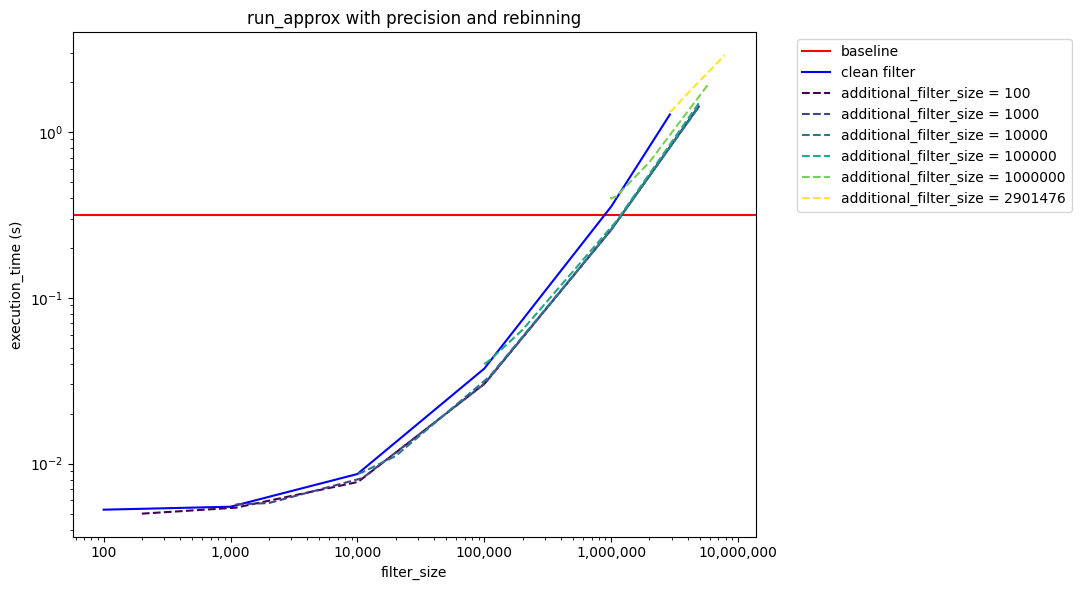

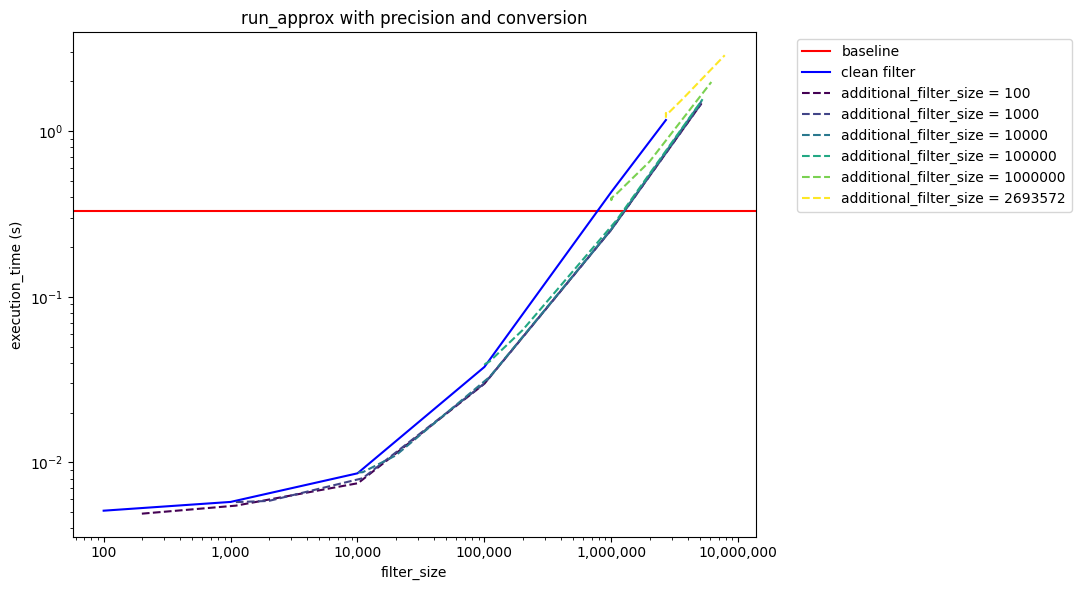

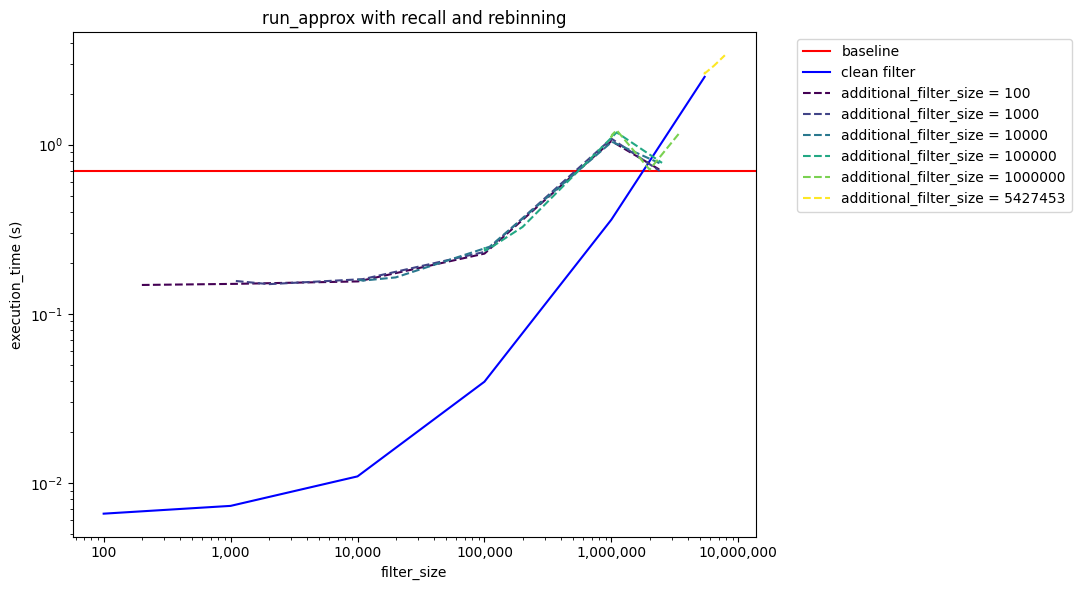

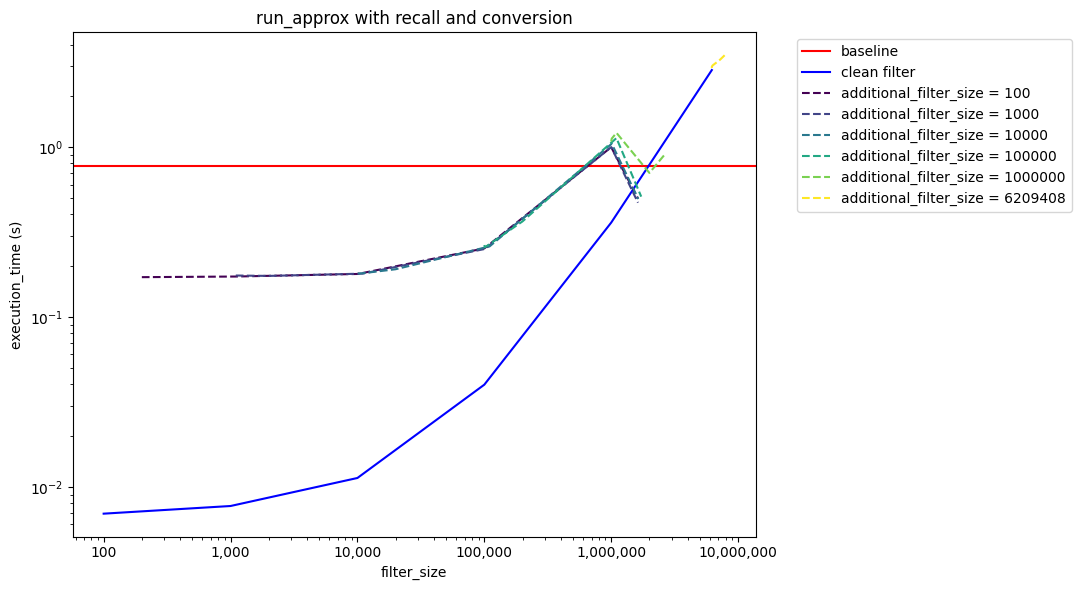

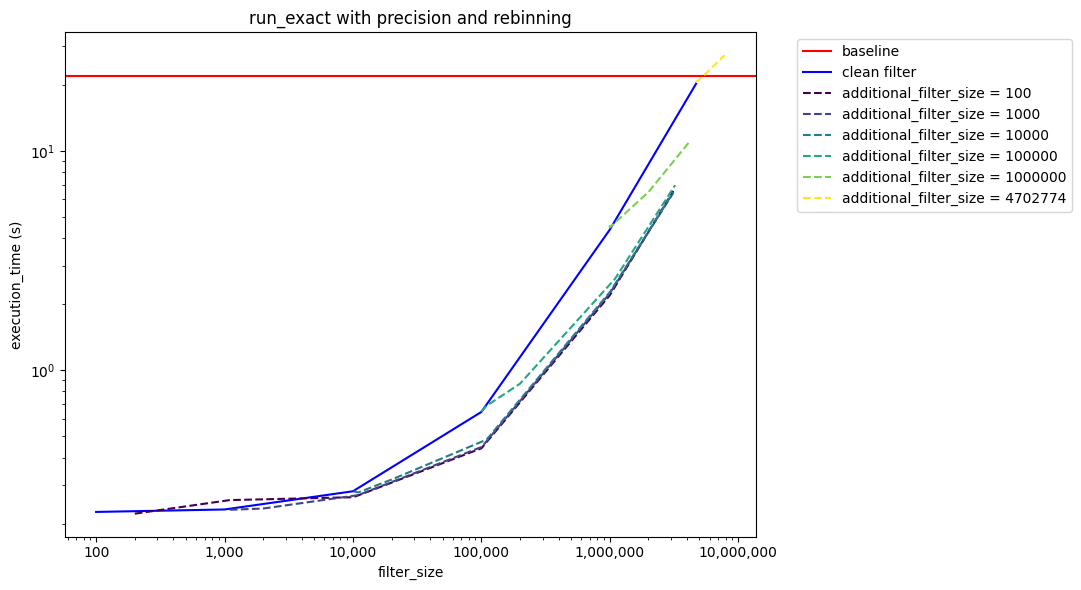

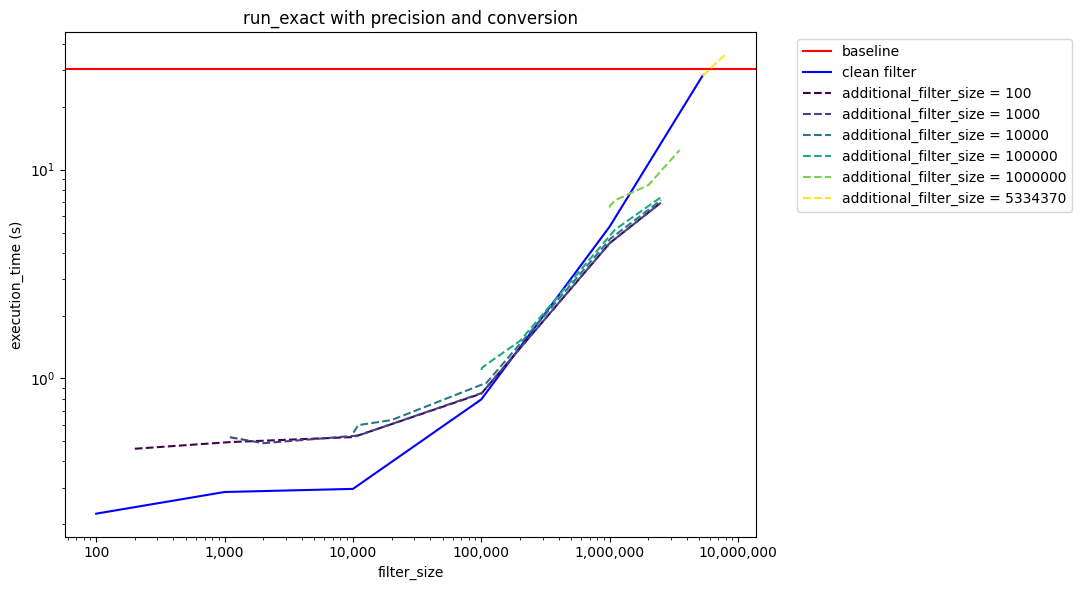

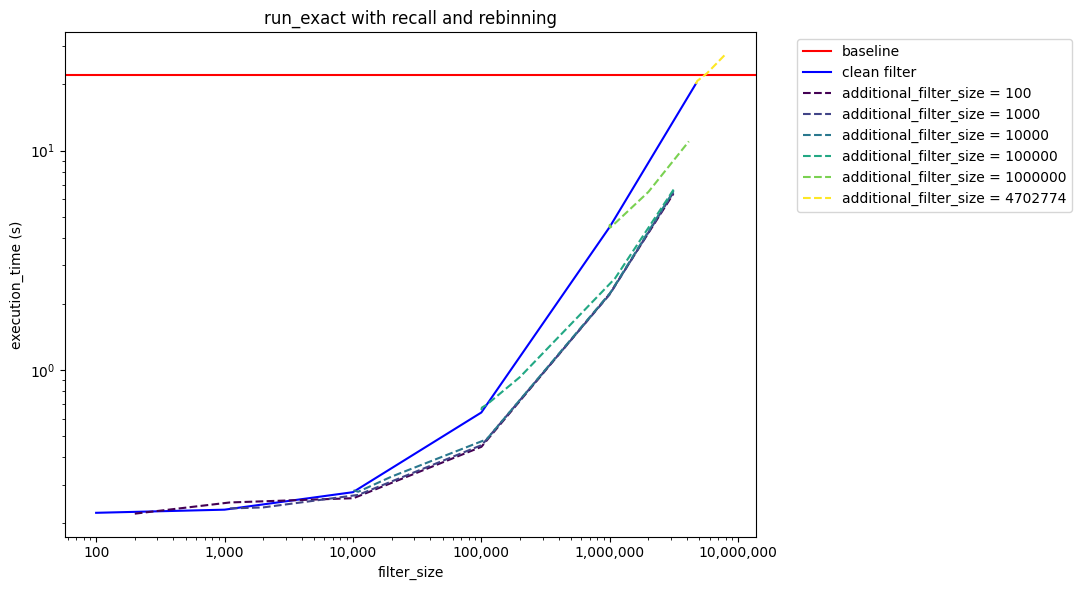

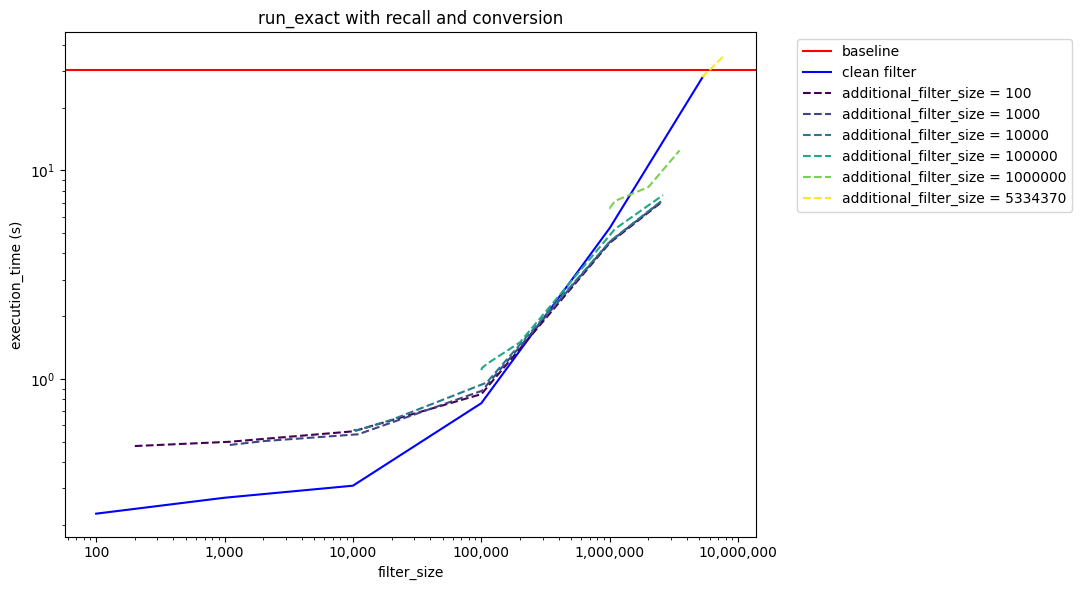

In [ ]:
# Plot execution_time with additional_filter_size on the x-axis (and filter_size is the same as additional_filter_size) 

# baseline filter_size = 0
df_baseline = df_latest[df_latest["filter_size"] == 0]

print(df_baseline)

# filter out the baseline
df_remaining = df_latest[df_latest["filter_size"] != 0]
# split into two dataframes: one where filter_size equals additional_filter_size, one where they differ
df_equal = df_remaining[df_remaining["additional_filter_size"] == df_remaining["filter_size"]]
df_different = df_remaining[df_remaining["additional_filter_size"] != df_remaining["filter_size"]]


# Group by additional_filter_size to create separate lines for each size
additional_filter_sizes = df_different["additional_filter_size"].unique()

plt.figure(figsize=(11, 6))
plt.title(f"Execution time for different filter sizes for HNSW index")
plt.xlabel("filter_size")
plt.ylabel("execution_time (s)")
plt.axhline(y=df_equal["execution_time"].mean(), color='r', linestyle='-', label="baseline")

# Plot a line for each additional_filter_size
colors = plt.cm.viridis(np.linspace(0, 1, len(additional_filter_sizes))) # type: ignore
for i, add_size in enumerate(additional_filter_sizes):
    df_size = df_different[df_different["additional_filter_size"] == add_size]
    df_size_mean = df_size.groupby("filter_size")["execution_time"].mean()
    plt.plot(df_size_mean.index, df_size_mean.values, 
            label=f"additional_filter_size = {add_size}", 
            linestyle='--',
            color=colors[i])

# Format x-axis ticks to show full numbers
plt.xscale("log")
plt.yscale("log")
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ','))) # type: ignore
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()




              timestamp  percentile comparison  reference fainder_mode  \
2   2025-03-16 13:07:44         0.1         le          1   run_approx   
3   2025-03-16 13:07:47         0.1         le          1   run_approx   
4   2025-03-16 13:07:50         0.1         le          1   run_approx   
5   2025-03-16 13:07:53         0.1         le          1   run_approx   
6   2025-03-16 13:07:56         0.1         le          1   run_approx   
7   2025-03-16 13:08:00         0.1         le          1   run_approx   
9   2025-03-16 13:08:06         0.1         le          1   run_approx   
10  2025-03-16 13:08:09         0.1         le          1   run_approx   
11  2025-03-16 13:08:12         0.1         le          1   run_approx   
12  2025-03-16 13:08:15         0.1         le          1   run_approx   
13  2025-03-16 13:08:18         0.1         le          1   run_approx   
14  2025-03-16 13:08:23         0.1         le          1   run_approx   
16  2025-03-16 13:08:28         0.1   

/tmp/ipykernel_7168/3467913826.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  baseline_filtered = mode_baseline[


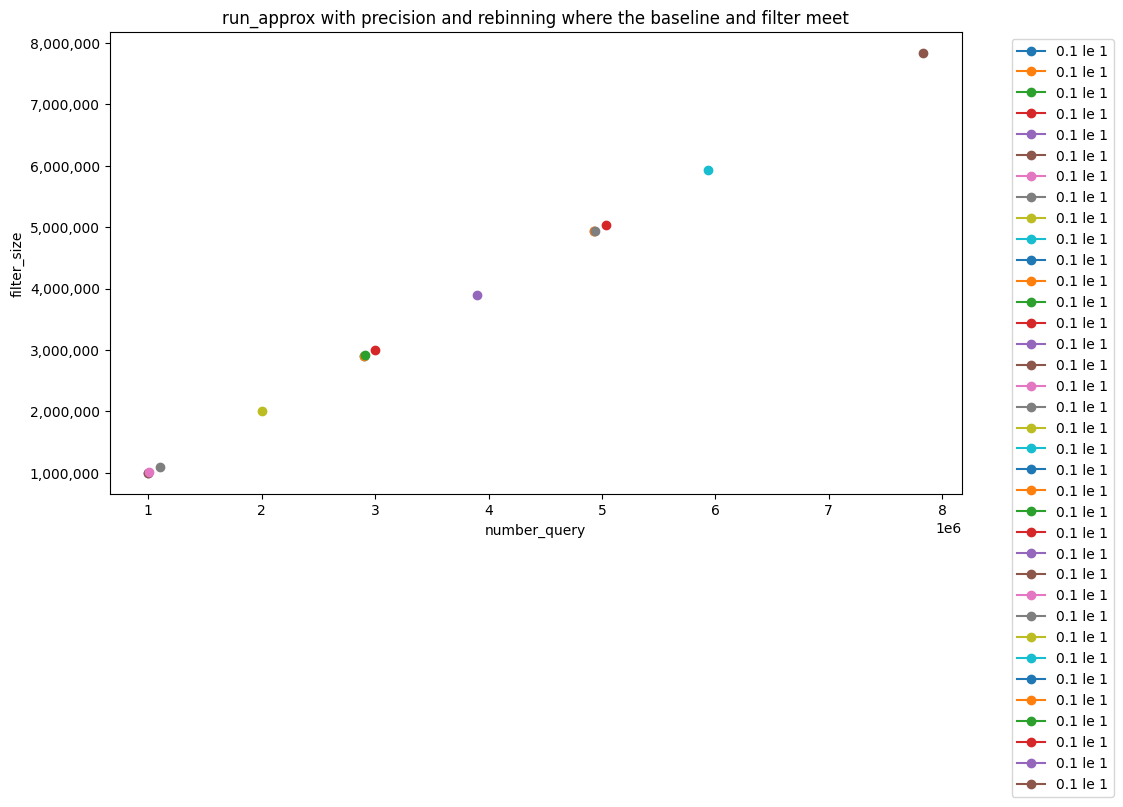

              timestamp  percentile comparison  reference fainder_mode  \
45  2025-03-16 13:10:19         0.1         le          1   run_approx   
46  2025-03-16 13:10:22         0.1         le          1   run_approx   
47  2025-03-16 13:10:25         0.1         le          1   run_approx   
48  2025-03-16 13:10:28         0.1         le          1   run_approx   
49  2025-03-16 13:10:32         0.1         le          1   run_approx   
50  2025-03-16 13:10:37         0.1         le          1   run_approx   
52  2025-03-16 13:10:44         0.1         le          1   run_approx   
53  2025-03-16 13:10:47         0.1         le          1   run_approx   
54  2025-03-16 13:10:50         0.1         le          1   run_approx   
55  2025-03-16 13:10:53         0.1         le          1   run_approx   
56  2025-03-16 13:10:57         0.1         le          1   run_approx   
57  2025-03-16 13:11:02         0.1         le          1   run_approx   
59  2025-03-16 13:11:09         0.1   

/tmp/ipykernel_7168/3467913826.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  baseline_filtered = mode_baseline[


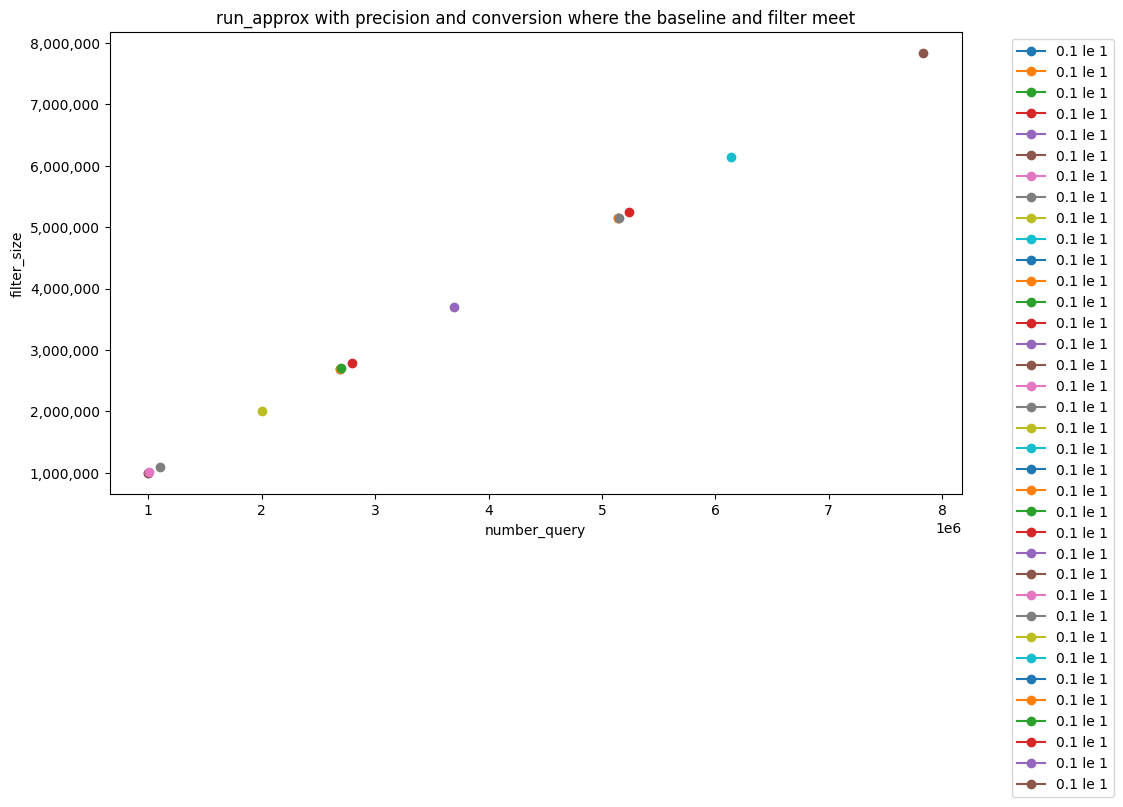

               timestamp  percentile comparison  reference fainder_mode  \
88   2025-03-16 13:13:08         0.1         le          1   run_approx   
89   2025-03-16 13:13:12         0.1         le          1   run_approx   
90   2025-03-16 13:13:15         0.1         le          1   run_approx   
91   2025-03-16 13:13:19         0.1         le          1   run_approx   
92   2025-03-16 13:13:24         0.1         le          1   run_approx   
93   2025-03-16 13:13:29         0.1         le          1   run_approx   
95   2025-03-16 13:13:36         0.1         le          1   run_approx   
96   2025-03-16 13:13:40         0.1         le          1   run_approx   
97   2025-03-16 13:13:44         0.1         le          1   run_approx   
98   2025-03-16 13:13:48         0.1         le          1   run_approx   
99   2025-03-16 13:13:53         0.1         le          1   run_approx   
100  2025-03-16 13:13:57         0.1         le          1   run_approx   
102  2025-03-16 13:14:05 

/tmp/ipykernel_7168/3467913826.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  baseline_filtered = mode_baseline[


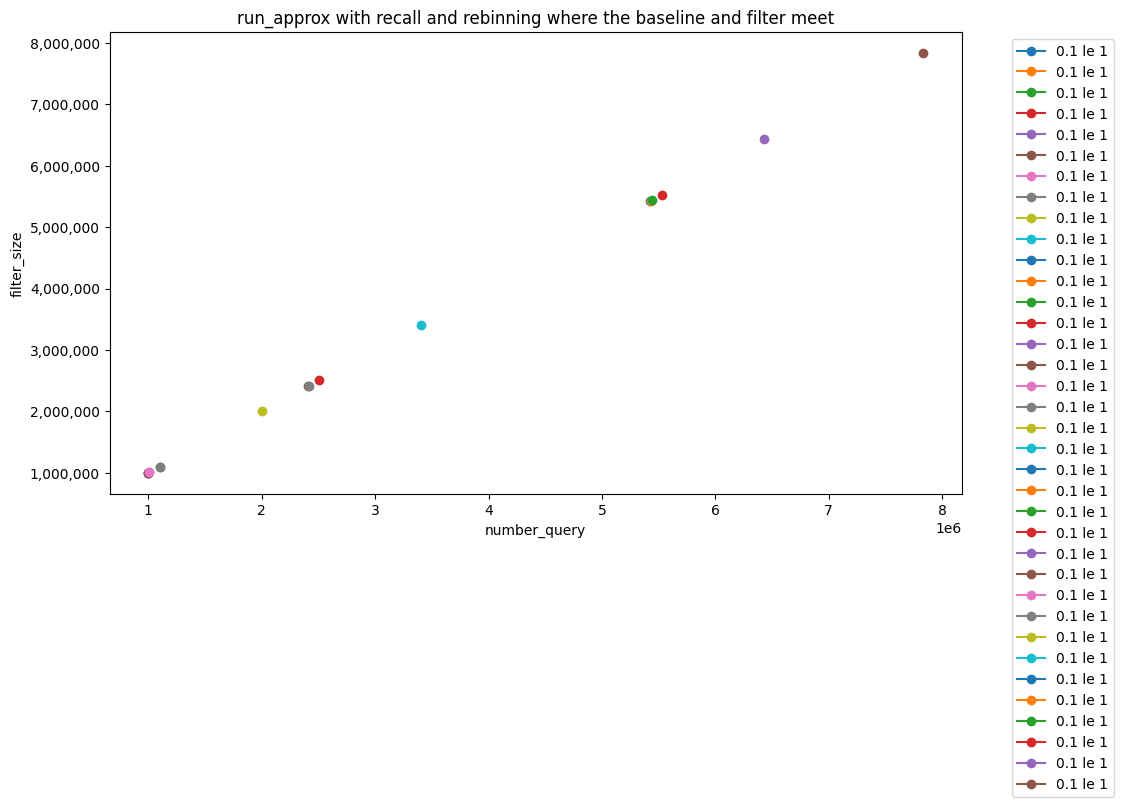

               timestamp  percentile comparison  reference fainder_mode  \
131  2025-03-16 13:16:32         0.1         le          1   run_approx   
132  2025-03-16 13:16:36         0.1         le          1   run_approx   
133  2025-03-16 13:16:39         0.1         le          1   run_approx   
134  2025-03-16 13:16:43         0.1         le          1   run_approx   
135  2025-03-16 13:16:48         0.1         le          1   run_approx   
136  2025-03-16 13:16:53         0.1         le          1   run_approx   
138  2025-03-16 13:17:00         0.1         le          1   run_approx   
139  2025-03-16 13:17:04         0.1         le          1   run_approx   
140  2025-03-16 13:17:08         0.1         le          1   run_approx   
141  2025-03-16 13:17:12         0.1         le          1   run_approx   
142  2025-03-16 13:17:17         0.1         le          1   run_approx   
143  2025-03-16 13:17:21         0.1         le          1   run_approx   
145  2025-03-16 13:17:29 

/tmp/ipykernel_7168/3467913826.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  baseline_filtered = mode_baseline[


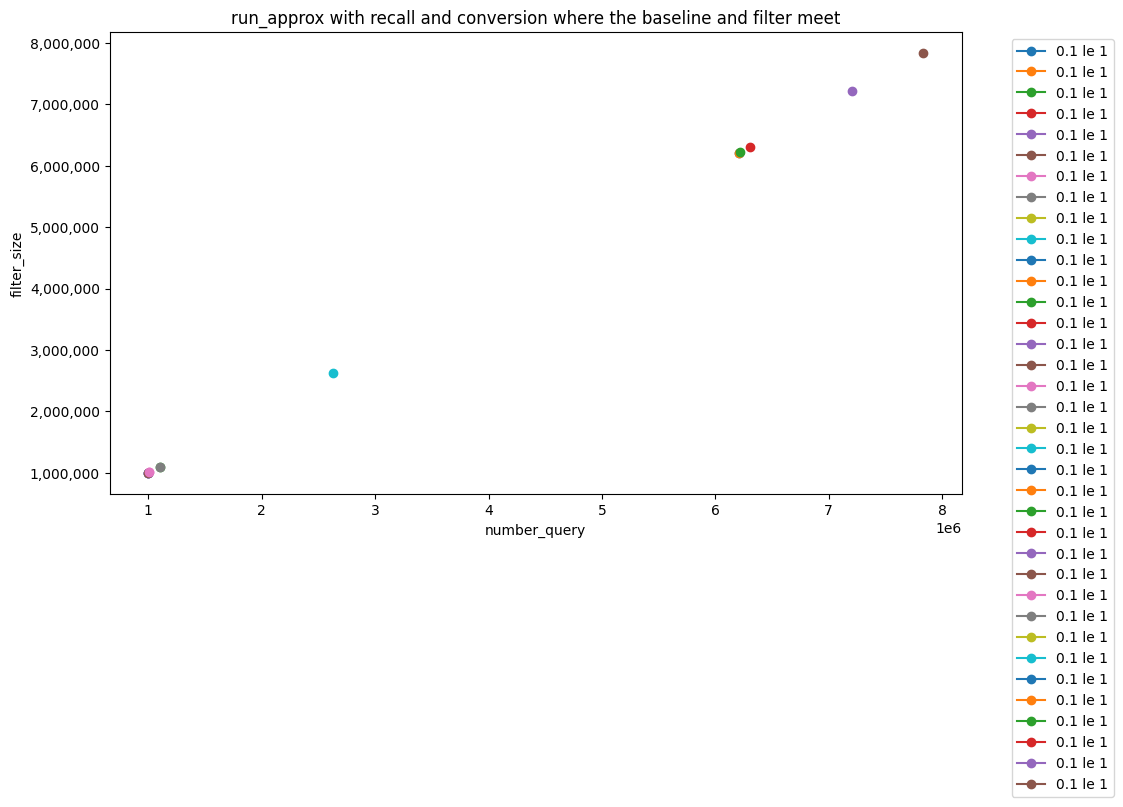

               timestamp  percentile comparison  reference fainder_mode  \
174  2025-03-16 13:20:20         0.1         le          1    run_exact   
175  2025-03-16 13:20:24         0.1         le          1    run_exact   
176  2025-03-16 13:20:28         0.1         le          1    run_exact   
177  2025-03-16 13:20:31         0.1         le          1    run_exact   
178  2025-03-16 13:20:37         0.1         le          1    run_exact   
179  2025-03-16 13:20:48         0.1         le          1    run_exact   
181  2025-03-16 13:20:55         0.1         le          1    run_exact   
182  2025-03-16 13:20:58         0.1         le          1    run_exact   
183  2025-03-16 13:21:02         0.1         le          1    run_exact   
184  2025-03-16 13:21:06         0.1         le          1    run_exact   
185  2025-03-16 13:21:12         0.1         le          1    run_exact   
186  2025-03-16 13:21:22         0.1         le          1    run_exact   
188  2025-03-16 13:21:29 

/tmp/ipykernel_7168/3467913826.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  baseline_filtered = mode_baseline[


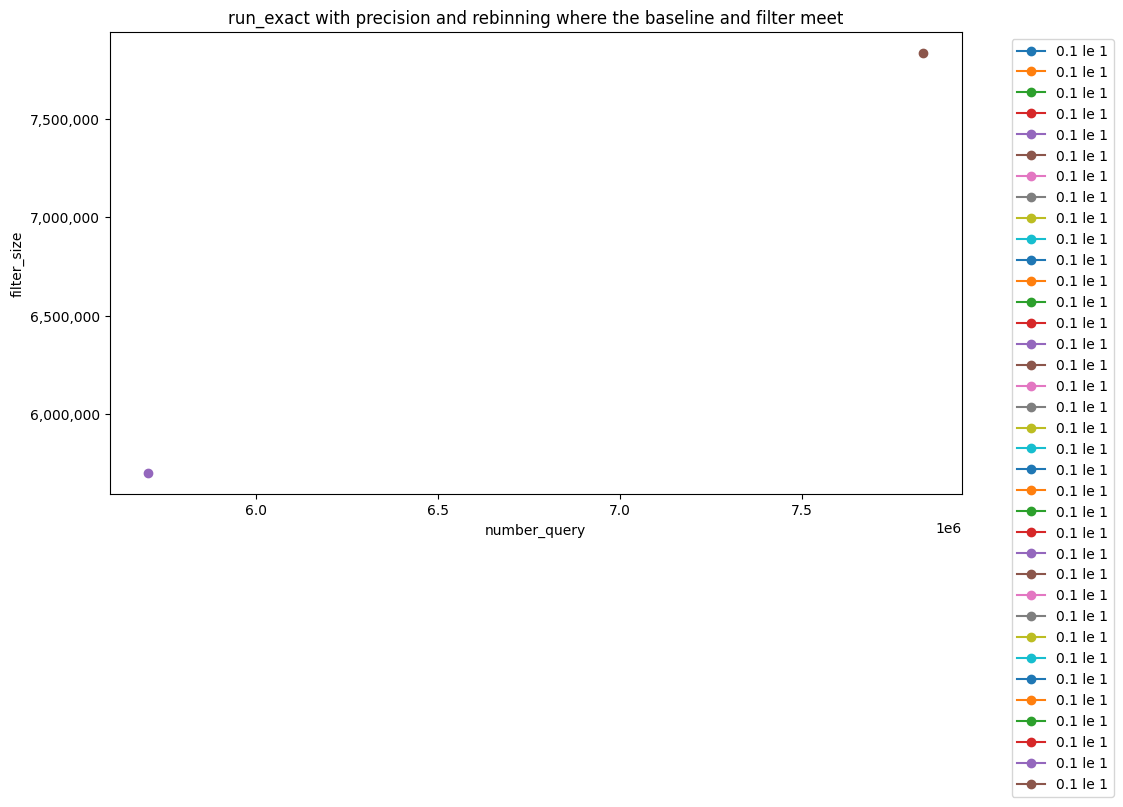

               timestamp  percentile comparison  reference fainder_mode  \
217  2025-03-16 13:27:20         0.1         le          1    run_exact   
218  2025-03-16 13:27:24         0.1         le          1    run_exact   
219  2025-03-16 13:27:28         0.1         le          1    run_exact   
220  2025-03-16 13:27:33         0.1         le          1    run_exact   
221  2025-03-16 13:27:41         0.1         le          1    run_exact   
222  2025-03-16 13:27:52         0.1         le          1    run_exact   
224  2025-03-16 13:28:00         0.1         le          1    run_exact   
225  2025-03-16 13:28:04         0.1         le          1    run_exact   
226  2025-03-16 13:28:07         0.1         le          1    run_exact   
227  2025-03-16 13:28:12         0.1         le          1    run_exact   
228  2025-03-16 13:28:20         0.1         le          1    run_exact   
229  2025-03-16 13:28:31         0.1         le          1    run_exact   
231  2025-03-16 13:28:39 

/tmp/ipykernel_7168/3467913826.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  baseline_filtered = mode_baseline[


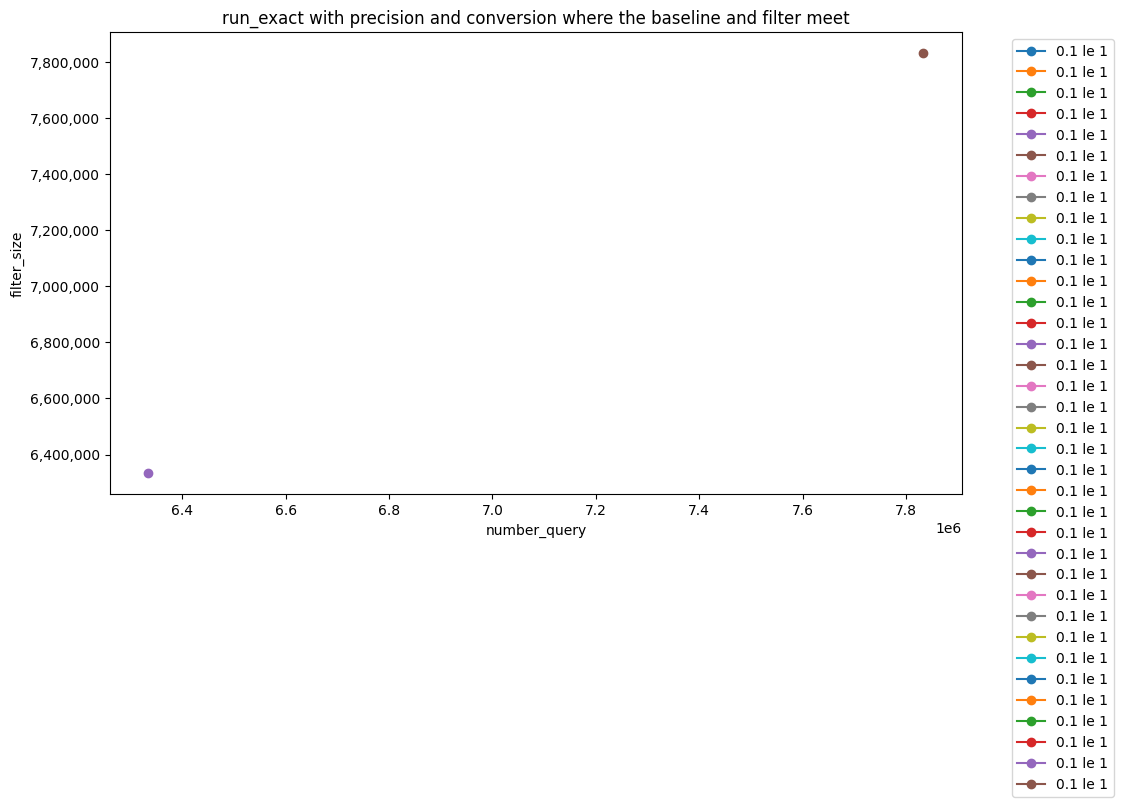

               timestamp  percentile comparison  reference fainder_mode  \
260  2025-03-16 13:35:43         0.1         le          1    run_exact   
261  2025-03-16 13:35:47         0.1         le          1    run_exact   
262  2025-03-16 13:35:50         0.1         le          1    run_exact   
263  2025-03-16 13:35:54         0.1         le          1    run_exact   
264  2025-03-16 13:36:00         0.1         le          1    run_exact   
265  2025-03-16 13:36:10         0.1         le          1    run_exact   
267  2025-03-16 13:36:17         0.1         le          1    run_exact   
268  2025-03-16 13:36:21         0.1         le          1    run_exact   
269  2025-03-16 13:36:24         0.1         le          1    run_exact   
270  2025-03-16 13:36:28         0.1         le          1    run_exact   
271  2025-03-16 13:36:34         0.1         le          1    run_exact   
272  2025-03-16 13:36:44         0.1         le          1    run_exact   
274  2025-03-16 13:36:52 

/tmp/ipykernel_7168/3467913826.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  baseline_filtered = mode_baseline[


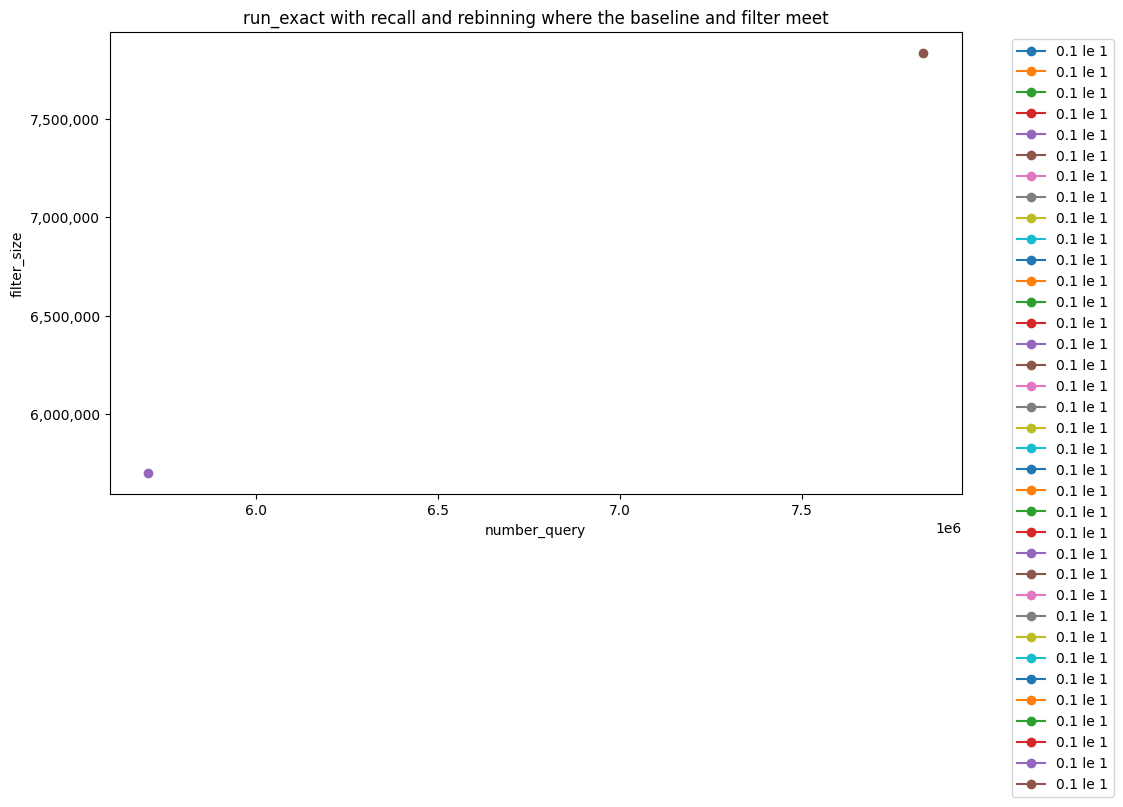

               timestamp  percentile comparison  reference fainder_mode  \
303  2025-03-16 13:42:41         0.1         le          1    run_exact   
304  2025-03-16 13:42:45         0.1         le          1    run_exact   
305  2025-03-16 13:42:49         0.1         le          1    run_exact   
306  2025-03-16 13:42:54         0.1         le          1    run_exact   
307  2025-03-16 13:43:02         0.1         le          1    run_exact   
308  2025-03-16 13:43:13         0.1         le          1    run_exact   
310  2025-03-16 13:43:21         0.1         le          1    run_exact   
311  2025-03-16 13:43:25         0.1         le          1    run_exact   
312  2025-03-16 13:43:29         0.1         le          1    run_exact   
313  2025-03-16 13:43:33         0.1         le          1    run_exact   
314  2025-03-16 13:43:41         0.1         le          1    run_exact   
315  2025-03-16 13:43:52         0.1         le          1    run_exact   
317  2025-03-16 13:44:01 

/tmp/ipykernel_7168/3467913826.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  baseline_filtered = mode_baseline[


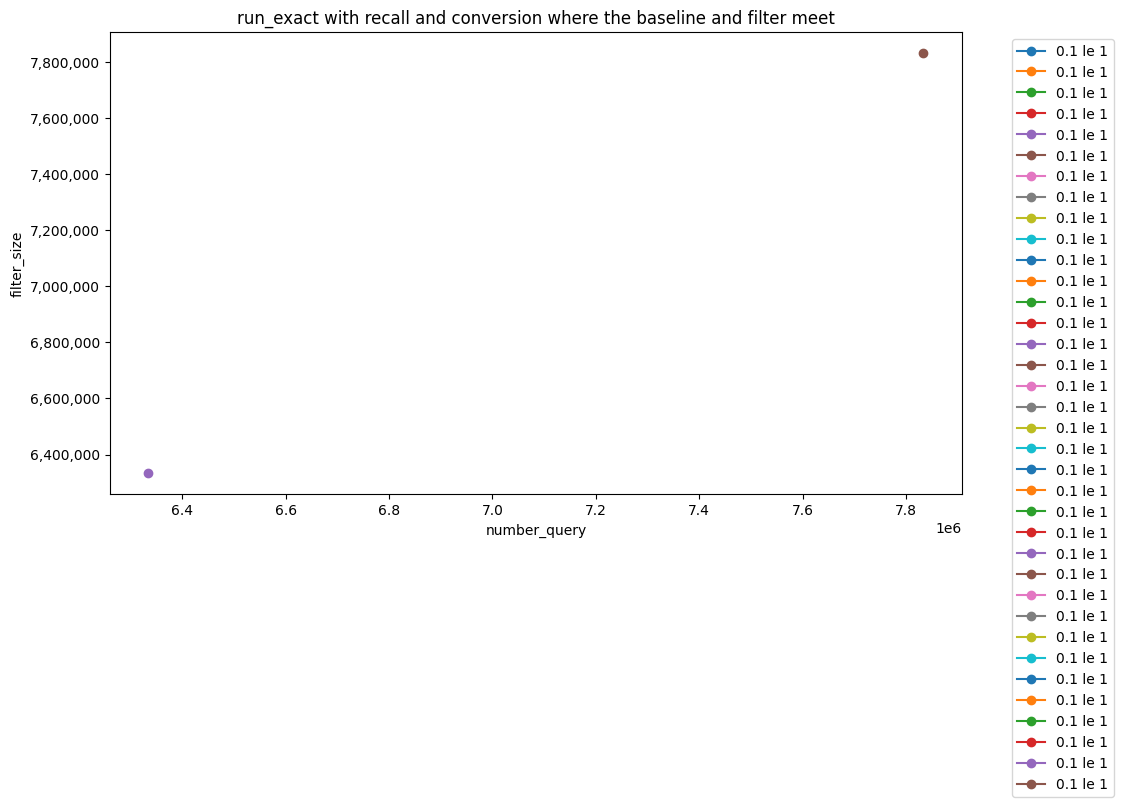

In [55]:
# TODO: add plots to find the values where the baseline and filter meet (for each combination of fainder_mode, index_mode and fainder_index a new plot) and for each filter_size - additional_filter_size combination a separate point
# look at the differents for different percentile queries

df_latest = pd.read_csv(latest_file)


baseline = df_latest[df_latest["filter_size"] == 0] 

# filter out the baseline
df_remaining = df_latest[df_latest["filter_size"] != 0]

# filter out filter_size - additional_filter_size not equal to 0
df_remaining = df_remaining[df_remaining["filter_size"] != df_remaining["additional_filter_size"]]

df_latest = df_remaining

# Get all unique combinations of fainder_mode, index_mode and fainder_index
unique_combinations = df_remaining[["fainder_mode", "index_mode", "fainder_index"]].drop_duplicates()

for index, row in unique_combinations.iterrows():
    fainder_mode = row["fainder_mode"]
    index_mode = row["index_mode"]
    fainder_index = row["fainder_index"]

    df = df_latest[
        (df_latest["fainder_mode"] == row["fainder_mode"]) & 
        (df_latest["index_mode"] == row["index_mode"]) & 
        (df_latest["fainder_index"] == row["fainder_index"])
    ]

    mode_baseline = baseline[
        (baseline["fainder_mode"] == row["fainder_mode"]) & 
        (baseline["index_mode"] == row["index_mode"]) & 
        (baseline["fainder_index"] == row["fainder_index"])
    ]

    # loop over all percentile, comparison,reference combinations
    queries = df[["percentile", "comparison", "reference"]].drop_duplicates()
    plt.figure(figsize=(11, 6))
    plt.title(f"{fainder_mode} with {index_mode} and {fainder_index} where the baseline and filter meet")
    plt.xlabel("number_query")
    plt.ylabel("filter_size")


    for index, row in queries.iterrows():
        percentile = row["percentile"]
        comparison = row["comparison"]
        reference = row["reference"]
        print(df)
        df_filtered = df[
            (df["percentile"] == percentile) & 
            (df["comparison"] == comparison) & 
            (df["reference"] == reference)
        ]

        # Get the baseline execution time
        baseline_filtered = mode_baseline[
            (baseline["percentile"] == percentile) & 
            (baseline["comparison"] == comparison) & 
            (baseline["reference"] == reference) 
        ]

        # Get the filter_size where the baseline and filter meet for each query and filter_size - additional_filter_size combination

        #Get all unique combinations of filter_size and additional_filter_size
        unique_combinations = df_filtered[["filter_size", "additional_filter_size"]].drop_duplicates()
        
        for index_filtersize, row in unique_combinations.iterrows():
            filter_size = row["filter_size"]
            additional_filter_size = row["additional_filter_size"]

            df_filtered_comb = df_filtered[
                (df_filtered["filter_size"] == filter_size) & 
                (df_filtered["additional_filter_size"] == additional_filter_size)
            ]

            # Filter out every value above the baseline
            df_filtered_comb = df_filtered_comb[df_filtered_comb["execution_time"] >= baseline_filtered["execution_time"].values[0]]

            # add filter_size - additional_filter_size as a field
            df_filtered_comb["filter_difference"] = df_filtered_comb["filter_size"] - df_filtered_comb["additional_filter_size"]

            df = df_filtered_comb["filter_difference"] == 0
            df = df_filtered_comb.groupby("filter_size")["filter_size"].max()
            plt.plot(df.index, df.values, label=f"{percentile} {comparison} {reference}", linestyle='-', marker='o')
            
            # for each filter_size - additional_filter_size combination get max filter_size
            #df_filtered_comb = df_filtered_comb.groupby("filter_difference")["filter_size"].max()
            #plt.plot(df_filtered_comb.index, df_filtered_comb.values, label=f"{percentile} {comparison} {reference}", linestyle='-', marker='o')
            

    # Format y-axis ticks to show full numbers
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ','))) # type: ignore
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
